# 1. Libraries and settings

In [1]:
import pandas as pd
import numpy as np
import math
import sklearn
import sklearn.preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sns
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, GlobalAveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from keras.utils import np_utils


#display parent directory and working directory
print(os.path.dirname(os.getcwd())+':', os.listdir(os.path.dirname(os.getcwd())));
print(os.getcwd()+':', os.listdir(os.getcwd()));

d:\programfiles\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\programfiles\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\programfiles\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\programfiles\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

D:\Value of Dream\108-1 深度學習\Deep Learning Tool\GRU\NYSE Stock: ['Categorical Dependent Variable', 'Continuous Dependent Variable']
D:\Value of Dream\108-1 深度學習\Deep Learning Tool\GRU\NYSE Stock\Categorical Dependent Variable: ['.ipynb_checkpoints', 'GRU for categorial y.pdf', 'GRU for categorical y.ipynb']


Using TensorFlow backend.


# 2. Analyze Data

In [2]:
df = pd.read_csv("D:/Value of Dream/108-1 深度學習/Deep Learning Tool/Data/prices-split-adjusted.csv", index_col = 0)
print(df.info())
print(df.head())
print(df.values.shape)
# number of different stocks
print('\nnumber of different stocks: ', len(list(set(df.symbol))))
print(list(set(df.symbol))[:10])

<class 'pandas.core.frame.DataFrame'>
Index: 851264 entries, 2016-01-05 to 2016-12-30
Data columns (total 6 columns):
symbol    851264 non-null object
open      851264 non-null float64
close     851264 non-null float64
low       851264 non-null float64
high      851264 non-null float64
volume    851264 non-null float64
dtypes: float64(5), object(1)
memory usage: 45.5+ MB
None
           symbol        open       close         low        high     volume
date                                                                        
2016-01-05   WLTW  123.430000  125.839996  122.309998  126.250000  2163600.0
2016-01-06   WLTW  125.239998  119.980003  119.940002  125.540001  2386400.0
2016-01-07   WLTW  116.379997  114.949997  114.930000  119.739998  2489500.0
2016-01-08   WLTW  115.480003  116.620003  113.500000  117.440002  2006300.0
2016-01-11   WLTW  117.010002  114.970001  114.089996  117.330002  1408600.0
(851264, 6)

number of different stocks:  501
['CL', 'NTRS', 'F', 'BBY', 'AME', 'N

In [3]:
df.tail()

,symbol,open,close,low,high,volume
date,,,,,,
2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0
2016-12-30,FTV,54.200001,53.630001,53.389999,54.480000,705100.0


In [4]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


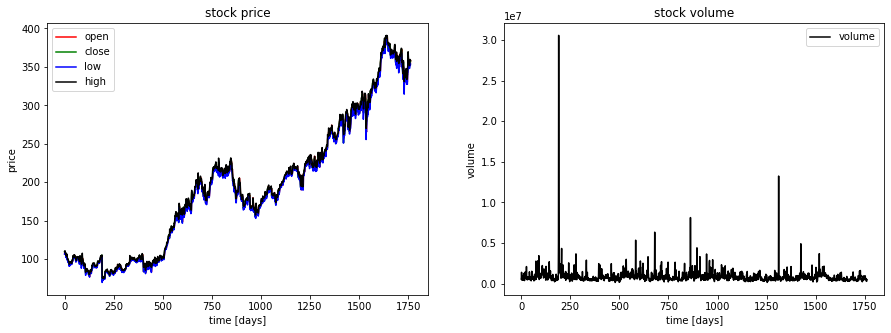

In [5]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(df[df.symbol == 'EQIX'].open.values, color='red', label='open')
plt.plot(df[df.symbol == 'EQIX'].close.values, color='green', label='close')
plt.plot(df[df.symbol == 'EQIX'].low.values, color='blue', label='low')
plt.plot(df[df.symbol == 'EQIX'].high.values, color='black', label='high')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
#plt.show()

plt.subplot(1,2,2);
plt.plot(df[df.symbol == 'EQIX'].volume.values, color='black', label='volume')
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');

# 3. Manipulate data 
- choose a specific stock
- drop feature: volume
- normalize stock data
- create train and test data sets

In [6]:
def feature_normalize(train):
    train_norm = train.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))  #標準化(介於0~1之間)
    return train_norm

In [7]:
## 很重要  切割視窗
def create_segments_and_labels(df, time_steps, step):#, label_name):
    """
    This function receives a dataframe and returns the reshaped segments
    of x,y,z acceleration as well as the corresponding labels
    Args:
        df: Dataframe in the expected format
        time_steps: Integer value of the length of a segment that is created
    Returns:
        reshaped_segments
        labels:
    """

#feature 有四個
    N_FEATURES = 4
#選擇測試切出20%
    test_set_size_percentage = 20
    segments = []
    labels = []
    
#     data_raw = df.as_matrix()
#創造時間窗，將所有選擇特徵一起切割視窗
    for i in range(0, len(df) - time_steps, step):#
        segments.append(df.values[i: i + time_steps])
#以當期四種特徵預測下一期收盤價
        rate = (df.open.values[i + time_steps]-df.open.values[i + time_steps-1])/df.open.values[i + time_steps-1]
        temp = rate
        if temp < 0:
            if temp <= -0.2:
                label =0
            elif temp <= -0.1:
                label =1
            elif temp < 0:
                label =2
        else:
            if temp == 0:
                label =3
            elif temp <= 0.1:
                label =4
            elif temp <= 0.2:
                label =5                
            elif temp >0.2:
                label =6              
        labels.append([label])
    test_set_size = np.round(test_set_size_percentage/100*np.asarray(segments).shape[0])
    train_set_size = int(np.asarray(segments).shape[0] - (test_set_size));  
    print(train_set_size)
#     segments = np.array(segments);
    reshaped_segments_train = np.asarray(segments[:train_set_size], dtype= np.float32).reshape(-1, time_steps, N_FEATURES)
    reshaped_segments_test = np.asarray(segments[train_set_size:], dtype= np.float32).reshape(-1, time_steps, N_FEATURES)
    labels_train = np.asarray(labels[:train_set_size])
    labels_test = np.asarray(labels[train_set_size:])
#以訓練資料占比分割訓練測試集，並以視窗最後一筆資料當作預測值
#     x_train = segments[:train_set_size,:,:]#(1394, 19, 4)
#     y_train = lables[:train_set_size,-1,:]#(1394, 4)
#     x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
#     y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]
#     x_test = segments[train_set_size:,:-1,:]
#     y_test = segments[train_set_size:,-1,:]    
    return reshaped_segments_train, labels_train, reshaped_segments_test,labels_test
#     return [x_train, y_train, x_valid, y_valid, x_test, y_test]


In [8]:
# choose one stock & drop volume
df_stock = df[df.symbol == 'EQIX'].copy()
df_stock.drop(['symbol'],1,inplace=True)
df_stock.drop(['volume'],1,inplace=True)

cols = list(df_stock.columns.values)
print('df_stock.columns.values = ', cols)

# normalize stock
df_stock_norm = df_stock.copy()
df_stock_norm = feature_normalize(df_stock_norm)

# create train, test data
time_steps = 20 # choose sequence length
step = 5
x_train, y_train, x_test, y_test = create_segments_and_labels(df_stock_norm, time_steps, step)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ', y_test.shape)
num_classes = 7
y_train_oneshot = np_utils.to_categorical(y_train, num_classes)
print(f"y_train_oneshot:{y_train_oneshot.shape}")
y_test_oneshot = np_utils.to_categorical(y_test, num_classes)
print(f"y_test_oneshot:{y_test_oneshot.shape}")

df_stock.columns.values =  ['open', 'close', 'low', 'high']
279
x_train.shape =  (279, 20, 4)
y_train.shape =  (279, 1)
x_test.shape =  (70, 20, 4)
y_test.shape =  (70, 1)
y_train_oneshot:(279, 7)
y_test_oneshot:(70, 7)


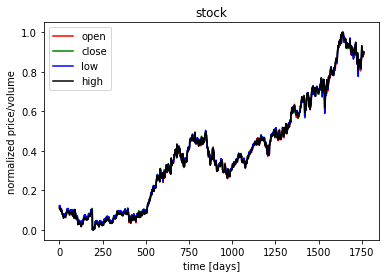

In [9]:
plt.plot(df_stock_norm.open.values, color='red', label='open')
plt.plot(df_stock_norm.close.values, color='green', label='close')
plt.plot(df_stock_norm.low.values, color='blue', label='low')
plt.plot(df_stock_norm.high.values, color='black', label='high')
#plt.plot(df_stock_norm.volume.values, color='gray', label='volume')
plt.title('stock')
plt.xlabel('time [days]')
plt.ylabel('normalized price/volume')
plt.legend(loc='best')
plt.show()

In [10]:
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
input_shape = (num_time_periods*num_sensors)   ## 80*3  每一筆資料 80(時間窗) 3個變數( xyz) 
x_train_reshape = x_train.reshape(x_train.shape[0], input_shape).astype('float32')
print(f"x_train_reshape.shape:{x_train_reshape.shape}")
x_test_reshape = x_test.reshape(x_test.shape[0], input_shape).astype('float32')
print(f"x_test_reshape.shape:{x_test_reshape.shape}")

x_train_reshape.shape:(279, 80)
x_test_reshape.shape:(70, 80)


# GRU

In [21]:
# Compatibility layer between Python 2 and Python 3
from __future__ import print_function
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector, GRU
from keras.layers import SimpleRNN, Activation, Dense, RNN
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from keras.callbacks import ReduceLROnPlateau
%matplotlib inline

In [12]:
# %%
## 統計的標準化
def feature_normalize(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.std(dataset, axis=0)
    return (dataset - mu)/sigma

In [13]:
def show_confusion_matrix(validations, predictions):
    LABELS = 7
    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix, cmap="coolwarm",linecolor='white', linewidths=1, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

In [14]:
## 只是將某一個 dataframe 的格式整理出來
def show_basic_dataframe_info(dataframe, preview_rows=20):
    """
    This function shows basic information for the given dataframe
    Args:
        dataframe: A Pandas DataFrame expected to contain data
        preview_rows: An integer value of how many rows to preview
    Returns:
        Nothing
    """
    # Shape and how many rows and columns
    print("Number of columns in the dataframe: %i" % (dataframe.shape[1]))
    print("Number of rows in the dataframe: %i\n" % (dataframe.shape[0]))
    print("First 20 rows of the dataframe:\n")
    # Show first 20 rows
    print(dataframe.head(preview_rows))
    print("\nDescription of dataframe:\n")
    # Describe dataset like mean, min, max, etc.
    # print(dataframe.describe())

In [15]:
## 讀入資料檔案  (但是限定檔案格式)
def read_data(file_path): 
    """
    This function reads the accelerometer data from a file
    Args:
        file_path: URL pointing to the CSV file
    Returns:
        A pandas dataframe
    """
    column_names = ['user-id', 'activity', 'timestamp', 'x-axis', 'y-axis', 'z-axis']  ## 這邊加入了欄位名稱
    df = pd.read_csv(file_path, header=None, names=column_names)
    # Last column has a ";" character which must be removed ...
## 如果需要改变原数据，需要添加常用参数 inplace=True
## df.replace(to_replace, value) 前面是需要替换的值，后面是替换后的值。
    df['z-axis'].replace(regex=True, inplace=True, to_replace=r';', value=r'')
    # ... and then this column must be transformed to float explicitly
    df['z-axis'] = df['z-axis'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df.dropna(axis=0, how='any', inplace=True)

    return df

In [16]:
def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan

In [17]:
def plot_axis(ax, x, y, title):
    ax.plot(x, y)
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

In [18]:
## 劃出時間序列圖    (但是限定檔案格式)
def plot_activity(activity, data): 
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 10), sharex=True)
    plot_axis(ax0, data['timestamp'], data['x-axis'], 'x-axis')
    plot_axis(ax1, data['timestamp'], data['y-axis'], 'y-axis')
    plot_axis(ax2, data['timestamp'], data['z-axis'], 'z-axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

In [22]:
learning_rate_function = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, #準確率重複3次就要減少
                                            verbose=1, 
                                            factor=0.5, #準確率乘上factor設成下一個learning_rate
                                            min_lr=0.00001) 


# ------- THE PROGRAM TO LOAD DATA AND TRAIN THE MODEL -------

In [23]:
model_gru = Sequential()
##  SimpleRNN  注意他的 input 格式!!(先變成三維，把第二維、三維放在這邊)
# model_lstm.add(SimpleRNN(units=128, input_shape=(x_train.shape[1], x_train.shape[2])))
# model_gru.add(LSTM(128, input_length= x_train.shape[1], input_dim= x_train.shape[2],return_sequences=False))
model_gru.add(GRU(units=128, input_shape=( x_train.shape[1], x_train.shape[2])))
#units隱藏層神經元個數
model_gru.add(Dropout(0.1))
model_gru.add(Dense(64, activation = 'relu'))
model_gru.add(Dropout(0.1))
model_gru.add(Dense(16, activation = 'relu'))#三層隱藏層
model_gru.add(Dropout(0.1))
model_gru.add(Dense(num_classes, activation='softmax'))
#num_classes不能改
model_gru.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])
model_gru.summary()

print("\n--- Fit the model ---\n")

train_history = model_gru.fit(x=x_train, y= y_train_oneshot, validation_split=0.1, epochs=550, batch_size=10,callbacks=[learning_rate_function],verbose=2)#callbacks=[learning_rate_function], verbose=2)


print("\n--- Learning curve of model training ---\n")

get_ipython().magic('matplotlib inline')
## IPython有一組預先定義好的所謂的魔法函數（Magic Functions），你可以通過命令列的語法形式來訪問它們。


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 128)               51072     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                1040      
_________________________________________________________________
dropout_6 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 7)                 119       
Total para

Epoch 73/550
 - 0s - loss: 1.0666 - acc: 0.4263 - val_loss: 0.7159 - val_acc: 0.3929
Epoch 74/550
 - 0s - loss: 1.0158 - acc: 0.4622 - val_loss: 0.7145 - val_acc: 0.3929
Epoch 75/550
 - 0s - loss: 1.0325 - acc: 0.4781 - val_loss: 0.7127 - val_acc: 0.3929
Epoch 76/550
 - 0s - loss: 0.9692 - acc: 0.5458 - val_loss: 0.7117 - val_acc: 0.3929
Epoch 77/550
 - 0s - loss: 1.0436 - acc: 0.4781 - val_loss: 0.7121 - val_acc: 0.3929
Epoch 78/550
 - 0s - loss: 1.0611 - acc: 0.4781 - val_loss: 0.7119 - val_acc: 0.3929
Epoch 79/550
 - 0s - loss: 1.0273 - acc: 0.5339 - val_loss: 0.7128 - val_acc: 0.3929
Epoch 80/550
 - 0s - loss: 1.0723 - acc: 0.4502 - val_loss: 0.7123 - val_acc: 0.3929
Epoch 81/550
 - 0s - loss: 1.0253 - acc: 0.4940 - val_loss: 0.7113 - val_acc: 0.3929
Epoch 82/550
 - 0s - loss: 1.0171 - acc: 0.5060 - val_loss: 0.7122 - val_acc: 0.3929
Epoch 83/550
 - 0s - loss: 1.0417 - acc: 0.4661 - val_loss: 0.7112 - val_acc: 0.3929
Epoch 84/550
 - 0s - loss: 1.0432 - acc: 0.4821 - val_loss: 0.710

Epoch 169/550
 - 0s - loss: 1.0506 - acc: 0.4781 - val_loss: 0.7096 - val_acc: 0.3929
Epoch 170/550
 - 0s - loss: 1.0341 - acc: 0.4861 - val_loss: 0.7101 - val_acc: 0.3929
Epoch 171/550
 - 0s - loss: 1.0575 - acc: 0.4781 - val_loss: 0.7121 - val_acc: 0.3929
Epoch 172/550
 - 0s - loss: 1.0373 - acc: 0.5100 - val_loss: 0.7114 - val_acc: 0.3929
Epoch 173/550
 - 0s - loss: 1.0573 - acc: 0.4781 - val_loss: 0.7102 - val_acc: 0.3929
Epoch 174/550
 - 0s - loss: 1.0483 - acc: 0.4701 - val_loss: 0.7110 - val_acc: 0.3929
Epoch 175/550
 - 0s - loss: 1.0224 - acc: 0.5179 - val_loss: 0.7099 - val_acc: 0.3929
Epoch 176/550
 - 0s - loss: 1.0560 - acc: 0.4622 - val_loss: 0.7094 - val_acc: 0.3929
Epoch 177/550
 - 0s - loss: 1.0178 - acc: 0.4741 - val_loss: 0.7088 - val_acc: 0.3929
Epoch 178/550
 - 0s - loss: 1.0296 - acc: 0.4940 - val_loss: 0.7084 - val_acc: 0.3929
Epoch 179/550
 - 0s - loss: 1.0310 - acc: 0.4143 - val_loss: 0.7087 - val_acc: 0.3929
Epoch 180/550
 - 0s - loss: 1.0092 - acc: 0.4582 - val

Epoch 265/550
 - 0s - loss: 1.0100 - acc: 0.4582 - val_loss: 0.7162 - val_acc: 0.3929
Epoch 266/550
 - 0s - loss: 1.0103 - acc: 0.4940 - val_loss: 0.7160 - val_acc: 0.3929
Epoch 267/550
 - 0s - loss: 1.0019 - acc: 0.4542 - val_loss: 0.7151 - val_acc: 0.3929
Epoch 268/550
 - 0s - loss: 1.0184 - acc: 0.4701 - val_loss: 0.7141 - val_acc: 0.3929
Epoch 269/550
 - 0s - loss: 1.0444 - acc: 0.4980 - val_loss: 0.7129 - val_acc: 0.3929
Epoch 270/550
 - 0s - loss: 1.0200 - acc: 0.4582 - val_loss: 0.7144 - val_acc: 0.3929
Epoch 271/550
 - 0s - loss: 1.0269 - acc: 0.4382 - val_loss: 0.7136 - val_acc: 0.3929
Epoch 272/550
 - 0s - loss: 1.0234 - acc: 0.5020 - val_loss: 0.7137 - val_acc: 0.3929
Epoch 273/550
 - 0s - loss: 1.0657 - acc: 0.4502 - val_loss: 0.7131 - val_acc: 0.3929
Epoch 274/550
 - 0s - loss: 0.9998 - acc: 0.4701 - val_loss: 0.7141 - val_acc: 0.3929
Epoch 275/550
 - 0s - loss: 1.0373 - acc: 0.4183 - val_loss: 0.7157 - val_acc: 0.3929
Epoch 276/550
 - 0s - loss: 1.0106 - acc: 0.5020 - val

Epoch 361/550
 - 0s - loss: 1.0190 - acc: 0.4661 - val_loss: 0.7150 - val_acc: 0.3929
Epoch 362/550
 - 0s - loss: 1.0319 - acc: 0.4422 - val_loss: 0.7150 - val_acc: 0.3929
Epoch 363/550
 - 0s - loss: 1.0120 - acc: 0.4940 - val_loss: 0.7170 - val_acc: 0.3929
Epoch 364/550
 - 0s - loss: 1.0216 - acc: 0.4502 - val_loss: 0.7185 - val_acc: 0.3929
Epoch 365/550
 - 0s - loss: 1.0066 - acc: 0.4701 - val_loss: 0.7191 - val_acc: 0.3929
Epoch 366/550
 - 0s - loss: 1.0299 - acc: 0.4582 - val_loss: 0.7200 - val_acc: 0.3929
Epoch 367/550
 - 0s - loss: 1.0105 - acc: 0.5100 - val_loss: 0.7197 - val_acc: 0.3929
Epoch 368/550
 - 0s - loss: 1.0374 - acc: 0.4821 - val_loss: 0.7185 - val_acc: 0.3929
Epoch 369/550
 - 0s - loss: 0.9972 - acc: 0.4701 - val_loss: 0.7180 - val_acc: 0.3929
Epoch 370/550
 - 0s - loss: 1.0009 - acc: 0.4582 - val_loss: 0.7170 - val_acc: 0.3929
Epoch 371/550
 - 0s - loss: 1.0013 - acc: 0.5100 - val_loss: 0.7194 - val_acc: 0.3929
Epoch 372/550
 - 0s - loss: 1.0252 - acc: 0.4900 - val

Epoch 457/550
 - 0s - loss: 0.9838 - acc: 0.4781 - val_loss: 0.7159 - val_acc: 0.3929
Epoch 458/550
 - 0s - loss: 1.0061 - acc: 0.4701 - val_loss: 0.7152 - val_acc: 0.3929
Epoch 459/550
 - 0s - loss: 1.0200 - acc: 0.4861 - val_loss: 0.7147 - val_acc: 0.3929
Epoch 460/550
 - 0s - loss: 1.0333 - acc: 0.4622 - val_loss: 0.7141 - val_acc: 0.3929
Epoch 461/550
 - 0s - loss: 0.9994 - acc: 0.4622 - val_loss: 0.7154 - val_acc: 0.3929
Epoch 462/550
 - 0s - loss: 1.0066 - acc: 0.4542 - val_loss: 0.7176 - val_acc: 0.3929
Epoch 463/550
 - 0s - loss: 1.0025 - acc: 0.4781 - val_loss: 0.7172 - val_acc: 0.3929
Epoch 464/550
 - 0s - loss: 0.9905 - acc: 0.5219 - val_loss: 0.7186 - val_acc: 0.3929
Epoch 465/550
 - 0s - loss: 0.9906 - acc: 0.5060 - val_loss: 0.7193 - val_acc: 0.3929
Epoch 466/550
 - 0s - loss: 0.9961 - acc: 0.4821 - val_loss: 0.7208 - val_acc: 0.3929
Epoch 467/550
 - 0s - loss: 0.9888 - acc: 0.4980 - val_loss: 0.7214 - val_acc: 0.3929
Epoch 468/550
 - 0s - loss: 1.0091 - acc: 0.4741 - val

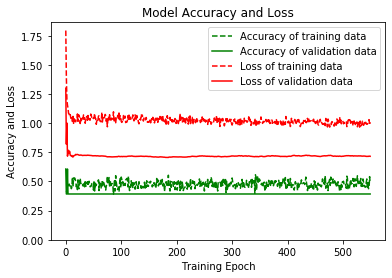

In [26]:
# summarize history for accuracy and loss
plt.figure(figsize=(6, 4))
plt.plot(train_history.history['acc'], "g--", label="Accuracy of training data")
plt.plot(train_history.history['val_acc'], "g", label="Accuracy of validation data")
plt.plot(train_history.history['loss'], "r--", label="Loss of training data")
plt.plot(train_history.history['val_loss'], "r", label="Loss of validation data")
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()


In [27]:
scoregru = model_gru.evaluate(x_test, y_test_oneshot, verbose=1)

print("\nAccuracy on test data: %0.2f" % scoregru[1])
print("\nLoss on test data: %0.2f" % scoregru[0])
scoregru

70/70 [==============================] - 0s 142us/step

Accuracy on test data: 0.40

Loss on test data: 0.72


[0.7214358738490514, 0.40000000085149495]


--- Confusion matrix for test data ---



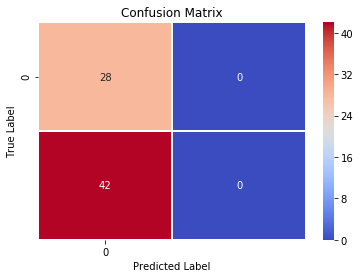


--- Classification report for test data ---

              precision    recall  f1-score   support

           2       0.40      1.00      0.57        28
           4       0.00      0.00      0.00        42

    accuracy                           0.40        70
   macro avg       0.20      0.50      0.29        70
weighted avg       0.16      0.40      0.23        70



d:\programfiles\python37\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
# %%

print("\n--- Confusion matrix for test data ---\n")
y_pred_test = model_gru.predict(x_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test_oneshot, axis=1)

show_confusion_matrix(max_y_test, max_y_pred_test)

# %%

print("\n--- Classification report for test data ---\n")

print(classification_report(max_y_test, max_y_pred_test))


